In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('dataset\googleplaystore.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [66]:
df.drop(index= 10472, inplace= True)

In [67]:
10472 in df.index

False

# Casting delle serie

In [68]:
def convert_size(val):
    if val[-1] == 'M':
        return round(float(val.replace('M','')), 2)
    elif val[-1] == 'k':
        return round(float(val.replace('k','')) / 1024, 2)
    else:
        return None

In [69]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors= 'coerce')

In [70]:
df['Size'] = df['Size'].apply(convert_size)

In [71]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

C:\Users\loren\AppData\Local\Temp\ipykernel_38160\2333575122.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)


In [72]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

C:\Users\loren\AppData\Local\Temp\ipykernel_38160\3760669725.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [73]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors= 'coerce')

# Controllo duplicati

In [74]:
df.duplicated().sum()

483

In [75]:
df.drop_duplicates(inplace= True)

In [76]:
# Creo una un dataset contenente tutti i valori duplicati che poi esporterò solo per una questione di comodità mia nella visualizzazione del dato 

duplicates = df[df['App'].duplicated(keep= False)]

In [77]:
# duplicates.to_csv('duplicates.csv', index= False)

In [78]:
# Ho creato una tabella dove vengono contati i valori diversi per ogni serie raggruppando le righe per 'App' 
# Mi è servito a me per capire in quali serie si trovavano i duplicati e in che quantità cosi da decidere come intervenire

table_duplicates = duplicates.groupby('App').nunique()

In [79]:
# Stesso discorso anche con questa tabella la esporto solo per poter vedere meglio i dati e analizzarli visivamente 

#table_duplicates.to_csv('table_duplicates.csv')

I dati duplicati risiedono prevalentemente nella colonna 'Reviews'. Ho deciso di tenere righe con il numero maggiore di reviews.

In [80]:
df.sort_values('Reviews', ascending= False, inplace= True)

In [81]:
df.drop_duplicates(subset= 'App', keep= 'first', inplace= True)

# Controllo valori nulli

In [82]:
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1228
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating

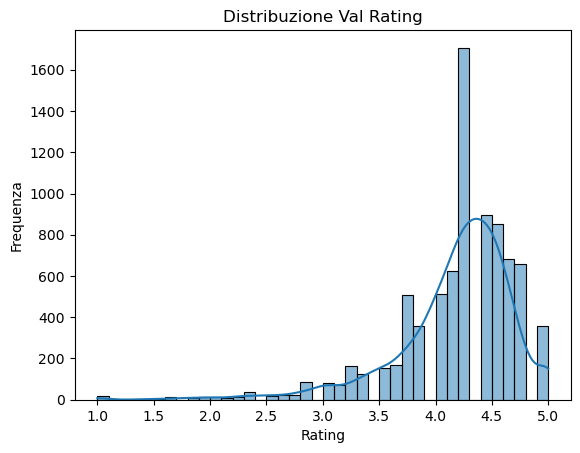

In [84]:
plt.figure()
sns.histplot(df['Rating'], bins= 40, kde=True)
plt.title('Distribuzione Val Rating')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.show()

In [85]:
# La distribuzione è fortemente asimmetrica negativa quindi imputerò usando la mediana poichè non viene influenzata dagli outlier

df['Rating'].fillna(df['Rating'].median(), inplace= True)

<Axes: xlabel='Rating', ylabel='Count'>

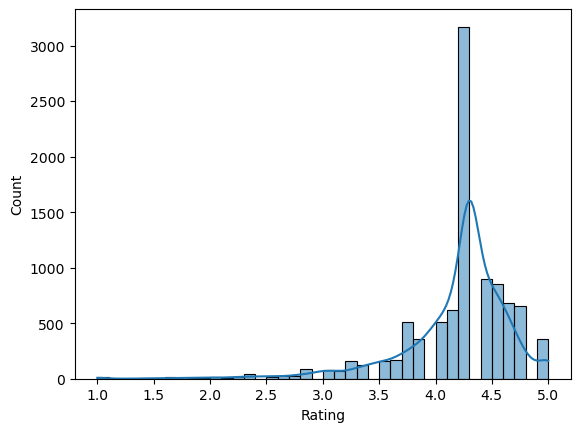

In [86]:
sns.histplot(df['Rating'], bins= 40, kde=True)

In [87]:

# Ho salvato una copia del'output df['Rating'].describe() prima dell'imputazione per valutare gli effetti di quest'ultima sui dati.
'''count    8196.000000
    mean        4.173267
    std         0.536253
    min         1.000000
    25%         4.000000
    50%         4.300000
    75%         4.500000
    max         5.000000
    Name: Rating, dtype: float64'''

df['Rating'].describe()

count    9659.000000
mean        4.192463
std         0.496055
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

# Size

<Axes: xlabel='Size', ylabel='Count'>

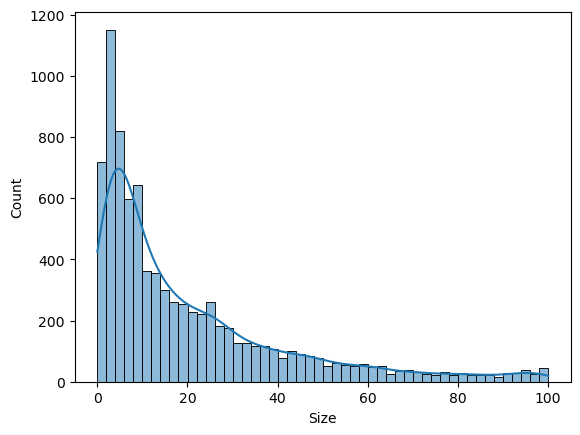

In [88]:
sns.histplot(df['Size'],bins=50, kde=True)

In [89]:
df['Size'].fillna(df['Size'].median(), inplace= True)

<Axes: xlabel='Size', ylabel='Count'>

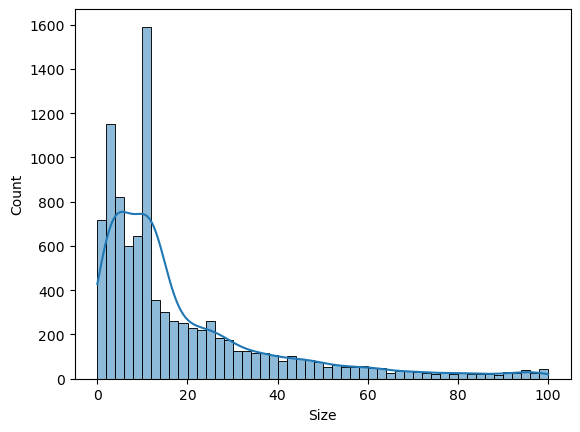

In [90]:
sns.histplot(df['Size'],bins=50, kde=True)

In [91]:
'''count    8431.000000
    mean       20.398084
    std        21.828949
    min         0.010000
    25%         4.600000
    50%        12.000000
    75%        28.000000
    max       100.000000
    Name: Size, dtype: float64'''

df['Size'].describe()

count    9659.000000
mean       19.330391
std        20.585039
min         0.010000
25%         5.300000
50%        12.000000
75%        25.000000
max       100.000000
Name: Size, dtype: float64

In [92]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 2544 to 6329
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [ ]:
df.to_csv('Task 1 googleplaystore pulito.csv', index= False)